<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/ColabNotebooks/practice3_transfer_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 3: Laplace Transform and Transfer Functions**
## **Goals for today**

---



During today practice we will:
* Recall the Laplace transform
* Define the transfer functions
* Model particular systems with transfer functions 


## **Laplace transform**

In mathematics, the Laplace transform, named after its inventor Pierre-Simon Laplace, is an integral transform that converts a function of a real variable $t$ (time domain) to a function of a complex variable $s$ (frequency domain). The transform has many applications in science and engineering because it is a tool for solving differential equations. In particular, it transforms differential equations into algebraic equations.

The Laplace transform of a function $f(t)$ is given as:
\begin{equation}
    F(s) = \mathcal{L} \{ x(t)\} = \int_0^\infty f(t) e^{-st}dt
\end{equation}

where $F(s)$ is called an ***image*** of the function and $s=\alpha +\beta i $ is a complex frequency.

Laplace transform is defined as transformation from the time domain $t$ to the frequency domain $s$.

it is convinient to use the table of precalculated Laplace transforms:
<p><img alt="mbk" height="340px" src="https://drive.google.com/uc?id=1ge8dKAmcvYr6VOmQ4ouzolNUDJ9V9wDH" align="center" hspace="220px" vspace="0px"></p>

#### **Some Usefull properties**
Linear properties:
\begin{equation}
    {\mathcal {L}}\{f(t)+g(t)\}={\mathcal {L}}\{f(t)\}+{\mathcal {L}}\{g(t)\}
\end{equation}

\begin{equation}
    {\mathcal {L}}\{af(t)\}=a{\mathcal {L}}\{f(t)\}
\end{equation}
Final value theorem:
\begin{equation}
f(\infty )=\lim _{s\to 0}{sF(s)}
\end{equation}
The final value theorem is useful because it gives the long-term behaviour for particular function. 

#### **Inverse Laplace Transform**
The inverse Laplace transform is going in other way, by transforming image of your function $F(s)$ from frequancy domain to time domain $x(t)$:
\begin{equation}
{\displaystyle f(t)={\mathcal {L}}^{-1}\{F\}(t)={\frac {1}{2\pi i}}\lim _{T\to \infty }\int _{\gamma -iT}^{\gamma +iT}e^{st}F(s)\,ds}
\end{equation}

However in poractice we mostly use precalculated laplace transforms and then trying to decompose the image $X(s)$ into known transforms of functions obtained from a table, and construct the inverse by inspection, or just use some symbolic routines:



In [ ]:
import sympy
sympy.init_printing()


In [ ]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [ ]:
f = sympy.exp(a*t)
f

In [ ]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [ ]:
f = sympy.inverse_laplace_transform(F, s, t)
f

In [ ]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)



In [ ]:
L(sympy.exp(a*t))

In [ ]:
invL(F)


>### **Exercise**
> Write the code that will reproduce the first 5 rows of the table above.

In [ ]:
# Put your code here



### **Laplace transform of a function's derivative**
>For us one of the most usefull properties of Laplace transform is that if we apply it to the derevetive of a given variable it will result with following:
>
> \begin{equation}
\mathcal{L}\left\{\frac{dx(t)}{dt}\right\} = s \mathcal{L}\left(x\right) = s X(s)
\end{equation}
which is true for $x(0) = 0$
>
>Thus we can define a **derivative operator**:
\begin{equation}
\frac{dx}{dt} \xrightarrow{\mathcal{L}} s X(s)
\end{equation}

The proof is as follows, using defenition of Laplace transform:
\begin{equation}
    \mathcal{L}\left\{\frac{dx}{dt}\right\} = \int_0^\infty \frac{dx}{dt} e^{-st}dt
\end{equation}
Then using integration by parts:

\begin{equation}
\int_0^\infty \frac{dx}{dt} e^{-st}dt =  \left[x e^{-st} \right]_0^\infty - 
\int_0^\infty -se^{-st} x dt 
\end{equation}
which yields:
\begin{equation}
\left[x e^{-st} \right]_0^\infty + 
s\int_0^\infty e^{-st} x dt = x(0) + s\mathcal{L}\{x(t)\} = x(0) + sX(s)
\end{equation}

by induction it can be shown that:
\begin{equation}
{\mathcal {L}}\left\{\frac{d^{n}x}{dt^{n}}(t)\right\}=s^{n}\cdot {\mathcal {L}}\{x(t)\}+s^{n-1}x(0)+\cdots +x^{(n-1)}(0)
\end{equation}

\begin{equation}
    \mathcal{L}\left(\frac{dx}{dt}\right) = \int_0^\infty \frac{dx}{dt} e^{-st}dt
\end{equation}

### **Applications to the linear ODEs**
>Let us consider the following ODE:
\begin{equation}
a_{n}x^{(n)} +a_{n-1}x^{(n-1)}+...+a_{2}\ddot x+a_{1}\dot x + a_0 x= u_{m}b^{(m)} +b_{m-1}u^{(m-1)}+...+b_{2}\ddot u+b_{1}\dot u + b_0 u
\end{equation}
Notice that we introduce a new variable that we call the input $u$ (control). 

Aplying the inverse laplace transform with zero initial conditions yields:
\begin{equation}
a_{n}s^{(n)}X(s) +a_{n-1}s^{(n-1)}X(s)+...+a_{2} s^2 X(s)+a_{1}s X(s) + a_0 X(s) =\\
= b_{m}s^{(m)}U(s) +b_{m-1}s^{(m-1)}U(s)+...+b_{2}s^2 U(s)+b_{1}sU(s) + b_0 U(s)
\end{equation}




>### **Exercise**
> Apply Laplace transform to the following ODEs:
>* $2 \ddot{x} -7 x  = u $
>* $ x^{(3)} - 2   \ddot x  + 2x  = u + 3\dot{u}$
>* $10 x^{(4)} -7  x^{(3)} + 2   \ddot x + 0.5 \dot x + 4x  = u + 3\dot{u} -2 {\ddot{u}}$


## **Transfer Functions**
A transfer function is a mathematical function which theoretically models the device's output for each possible input. Transfer functions are commonly used in the analysis of systems such as single-input single-output filters in the fields of signal processing, communication theory, and control theory. The term is often used exclusively to refer to linear time-invariant (LTI) systems

Thus, for continuous-time input signal $u(t)$ and output $x(t)$, the transfer function $H(s)$ is the linear mapping of the Laplace transform of the input, $U(s) = \mathcal{L}\left\{u(t)\right\}$, to the Laplace transform of the output $X(s) = \mathcal{L}\left\{x(t)\right\}$:
\begin{equation}
 X(s) = W(s)\;U(s) \rightarrow  W(s) = \frac{X(s)}{U(s)} = \frac{ \mathcal{L}\left\{x(t)\right\} }{ \mathcal{L}\left\{u(t)\right\} }
\end{equation}

Considering this defenition we can evaluate tha transfer function for ODE given above as:
\begin{equation}
W(s) = \frac{X(s)}{U(s)} = \frac{b_{m}s^{(m)} +b_{m-1}s^{(m-1)}+...+b_{2}s^2 +b_{1}s + b_0 }{a_{n}s^{(n)} +a_{n-1}s^{(n-1)}+...+a_{2} s^2 +a_{1}s  + a_0 }
\end{equation}

A transfer function thus represent the ODE by its behaviour from input image $U(s)$ to output image $X(s)$.




>### **Example**
>Consider the mass-spring-damper system:
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>
>
> with dynamics given by
> \begin{equation}
m \ddot y + b \dot y + k y = u
\end{equation} 
>
>where $u$ is force that applied to the mass, let's model this system by using transfer functions.



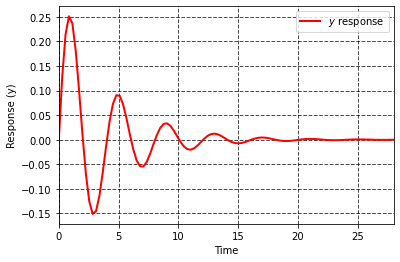

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Simulate m d^2y/dt^2 + b dy/dt + k y = u 
# from u to y
# W(s) = 1/(m s^2 + bs + k)

m = 2
b = 1
k = 5

num = [1,0]
den = [m, b, k]
sys_tf = signal.TransferFunction(num,den)
t_tf,y_tf = signal.step(sys_tf)

plt.figure(1)
plt.plot(t_tf,y_tf,'r',linewidth=2,label=r'$y$ response')
plt.xlabel(r'Time')
plt.ylabel(r'Response (y)')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([t_tf[0], t_tf[-1]])
plt.legend(loc='best')
plt.show()

 >### **Exercises**
> 1) Find the transfer function of the ODEs given above
>
> 2) Modify the code above to represent the response from input force $u$ to output velocity $\dot{y}$
>
> 2) Compare solutions with ones provided by `odeint` 


### **From State Space to Transfer Functions**

Consider standard form state-space dynamical system:

\begin{equation}
\begin{cases}
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
     \mathbf{y}  = \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}

We can rewrite it using the derivative operator:

\begin{equation}
\begin{cases}
s\mathbf{I}\mathbf{X}(s) -\mathbf{A}\mathbf{X}(s) = \mathbf{B}\mathbf{U}(s) \\
\mathbf{Y}(s)  = \mathbf{C}\mathbf{X}(s) + \mathbf{D}\mathbf{U}(s)
\end{cases}
\end{equation}

and then collect $\mathbf{X}(s)$ on the left-hand-side: $\mathbf{X}(s) = (s\mathbf{I} -\mathbf{A})^{-1} \mathbf{B}\mathbf{U}(s)$

and finally, express $\mathbf{Y}(s)$ output:

\begin{equation}
\mathbf{Y}(s)  = \left( \mathbf{C}(s\mathbf{I} -\mathbf{A})^{-1} \mathbf{B} + \mathbf{D} \right) \mathbf{U}(s)
\end{equation}



>### **Example**
> Let us recall the "love equation" between Romeo and Juliet:
\begin{equation}
\begin{bmatrix}
\dot{J} \\
\dot{R} 
\end{bmatrix} = 
\begin{bmatrix}
-b  R \\
a J
\end{bmatrix}
\end{equation}

But now lets consider the case when they can manipulate each other feelings with some control inputs $u_R$ and $u_J$, however suppose Romeo now really love to manipulate Juliet feelings but hold down a bit when notice Juliet manipulation thus:
\begin{equation}
\begin{bmatrix}
\dot{J} \\
\dot{R} 
\end{bmatrix} = 
\begin{bmatrix}
-b  R + c u_R - d u_J\\
a J + e u_R
\end{bmatrix}
\end{equation}
State space representation of this system is given as:
\begin{equation}
\begin{bmatrix}
\dot{J} \\
\dot{R} 
\end{bmatrix} = 
\begin{bmatrix}
0 & -b \\
a & 0 
\end{bmatrix}
\begin{bmatrix}
J \\
R 
\end{bmatrix} +
\begin{bmatrix}
-d & c \\
0 & e 
\end{bmatrix}
\begin{bmatrix}
u_J \\
u_R 
\end{bmatrix}
\end{equation}

And our goal is to find the transfer functions form Romeo effort to Juliet love and vice versa. 

Lets first find the solution analytically:

In [ ]:
a, b, c, d, e = sympy.symbols('a, b, c, d, e') 
s = sympy.symbols('s')

A = sympy.Matrix([[0, -b], [a, 0]])
B = sympy.Matrix([[-d, c],[0, e]])


In [ ]:
Xs = (s * sympy.eye(2) - A).inv()*B
Xs

⎡ -d⋅s         b⋅e        c⋅s   ⎤
⎢────────  - ──────── + ────────⎥
⎢       2           2          2⎥
⎢a⋅b + s     a⋅b + s    a⋅b + s ⎥
⎢                               ⎥
⎢ -a⋅d        a⋅c        e⋅s    ⎥
⎢────────   ──────── + ──────── ⎥
⎢       2          2          2 ⎥
⎣a⋅b + s    a⋅b + s    a⋅b + s  ⎦

In [ ]:
# lets now denote output equations
C = sympy.Matrix([[1, 0]])
D = sympy.Matrix([[0,0]])

In [ ]:
Ys = C*(s * sympy.eye(2) - A).inv()*B +D
Ys

⎡ -d⋅s         b⋅e        c⋅s   ⎤
⎢────────  - ──────── + ────────⎥
⎢       2           2          2⎥
⎣a⋅b + s     a⋅b + s    a⋅b + s ⎦

We can do the same numerically instead:

In [ ]:
from scipy.signal import ss2tf
a, b, c, d, e = 1, 1, 1, 1, 1

A = [[0, -b], [a, 0]]
B = [[-d, c],[0, e]]
C = [[1, 0],[0, 1]]
D = [[0,0],[0,0]]
ss2tf(A, B, C, D)

(array([[ 0, -1,  0],
        [ 0,  0, -1]]), array([1., 0., 1.]))

>### **Exercises**
> Simulate the response of "love" system using transfer functions and state space approaches compare results. (you may use [this as reference](https://apmonitor.com/pdc/index.php/Main/ModelSimulation) )


>### **Bonus Exercise**
> Considering the following ODE:
> \begin{equation}
a_{n}y^{(n)} +a_{n-1}y^{(n-1)}+...+a_{2}\ddot y+a_{1}\dot y + a_0 y= u_{m}b^{(m)} +b_{m-1}u^{(m-1)}+...+b_{2}\ddot u+b_{1}\dot u + b_0 u
\end{equation}
>With related transfer function:
\begin{equation}
W(s) = \frac{Y(s)}{U(s)} = \frac{b_{m}s^{(m)} +b_{m-1}s^{(m-1)}+...+b_{2}s^2 +b_{1}s + b_0 }{a_{n}s^{(n)} +a_{n-1}s^{(n-1)}+...+a_{2} s^2 +a_{1}s  + a_0 }
\end{equation}
>
>where $Y(s) = \mathcal{}$ $m\leq n$ suggest a method to represent it in the equalient state space representation:
\begin{equation}
\begin{cases}
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u} \\
     \mathbf{y}  = \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
\end{cases}
\end{equation}
and output $Y(s) = \mathcal{L}\{y\} = \mathcal{L}\{\mathbf{y}_1\} =\mathcal{L}\{\mathbf{x}_1\}$ 
>
>Use [this link as reference](https://lpsa.swarthmore.edu/Representations/SysRepTransformations/TF2SS.html)